# ANIME RECOMMENDATION SYSTEM

## BUSINESS UNDERSTANDING

### OVERVIEW

The explosive growth in the amount of available digital information and the number of visitors to the Internet have created a big challenge where consumers have a wide variety of choices but yet very few choices at their disposal and producers have a difficult time figuring out their potential market. 

Information retrieval systems, such as Google, DevilFinder and Altavista have partially solved this problem but the personalization of this data to make relevant recommendations to consumers and producers was absent.
Recommender systems are information filtering systems that deal with the problem of information overload by filtering vital information fragment out of large amount of dynamically generated information according to user’s preferences, interest, or observed behavior about an item. Recommender system has the ability to predict whether a particular user would prefer an item or not based on the user’s profile.

Recommender systems are beneficial to both service providers and users. They reduce transaction costs of finding and selecting items in an online shopping environment. Recommendation systems have also proved to improve decision making process and quality.

In e-commerce setting, recommender systems enhance revenues, for the fact that they are effective means of selling more products. In scientific libraries, recommender systems support users by allowing them to move beyond catalog searches. Therefore, the need to use efficient and accurate recommendation techniques within a system that will provide relevant and dependable recommendations for users cannot be over-emphasized.


### PROBLEM STATEMENT

By contrast, nowadays, the Internet allows people to access abundant resources online. Netflix, for example, has an enormous collection of movies. Although the amount of available information increased, a new problem arose as people had a hard time selecting the items they actually want to see and the production companies had a difficult time locating their target audience.

Due to the prevalence of the Internet, we need recommender systems in modern society that will assist people in finding pro

### PROPOSED SOLUTION

The most appropriate solution to deal with our problem is to come up with a system that would recommend movies to our consumers based on their preferences and tastes in order to maximize consumer utility and increase profits for producer companies.

Due to the prevalence of the Internet, we need recommender systems in modern society that will assist people in finding products that are in their tastes and preference from the vast options. Moreover, recommendation systems can be deployed on commercial websites to help producers market their products to the right consumers.


### JUSTIFICATION

### SPECIFIC OBJECTIVES



# DATA UNDERSTANDING

In [29]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

In [30]:
# load data
df = pd.read_csv('Anime_data.csv', index_col = ['Anime_id'])

# preview of data
df.head()

,Title,Genre,Synopsis,Type,Producer,Studio,Rating,ScoredBy,Popularity,Members,Episodes,Source,Aired,Link
Anime_id,,,,,,,,,,,,,,
1,Cowboy Bebop,"['Action', 'Adventure', 'Comedy', 'Drama', 'Sc...","In the year 2071, humanity has colonized sever...",TV,['Bandai Visual'],['Sunrise'],8.81,363889.0,39.0,704490.0,26.0,Original,"Apr 3, 1998 to Apr 24, 1999",https://myanimelist.net/anime/1/Cowboy_Bebop
5,Cowboy Bebop: Tengoku no Tobira,"['Action', 'Space', 'Drama', 'Mystery', 'Sci-Fi']","Another day, another bounty—such is the life o...",Movie,"['Sunrise', 'Bandai Visual']",['Bones'],8.41,111187.0,475.0,179899.0,1.0,Original,"Sep 1, 2001",https://myanimelist.net/anime/5/Cowboy_Bebop__...
6,Trigun,"['Action', 'Sci-Fi', 'Adventure', 'Comedy', 'D...","Vash the Stampede is the man with a $$60,000,0...",TV,['Victor Entertainment'],['Madhouse'],8.31,197451.0,158.0,372709.0,26.0,Manga,"Apr 1, 1998 to Sep 30, 1998",https://myanimelist.net/anime/6/Trigun
7,Witch Hunter Robin,"['Action', 'Magic', 'Police', 'Supernatural', ...",Witches are individuals with special powers li...,TV,['Bandai Visual'],['Sunrise'],7.34,31875.0,1278.0,74889.0,26.0,Original,"Jul 2, 2002 to Dec 24, 2002",https://myanimelist.net/anime/7/Witch_Hunter_R...
8,Bouken Ou Beet,"['Adventure', 'Fantasy', 'Shounen', 'Supernatu...",It is the dark century and the people are suff...,TV,NaN,['Toei Animation'],7.04,4757.0,3968.0,11247.0,52.0,Manga,"Sep 30, 2004 to Sep 29, 2005",https://myanimelist.net/anime/8/Bouken_Ou_Beet


In [31]:
# checking last 15 rows
df.tail(15)

,Title,Genre,Synopsis,Type,Producer,Studio,Rating,ScoredBy,Popularity,Members,Episodes,Source,Aired,Link
Anime_id,,,,,,,,,,,,,,
12723,Loups=Garous Pilot,NaN,NaN,Special,NaN,NaN,5.87,NaN,NaN,622.0,NaN,NaN,NaN,NaN
32588,Meow no Hoshi,NaN,NaN,OVA,NaN,NaN,5.58,NaN,NaN,212.0,NaN,NaN,NaN,NaN
9056,Agitated Screams of Maggots,NaN,NaN,Music,NaN,NaN,4.45,NaN,NaN,2921.0,NaN,NaN,NaN,NaN
33655,Alps no Shoujo Heidi? Chara Onji,NaN,NaN,TV,NaN,NaN,6.79,NaN,NaN,277.0,NaN,NaN,NaN,NaN
31385,Ginga Shounen Tai,NaN,NaN,TV,NaN,NaN,6.38,NaN,NaN,79.0,NaN,NaN,NaN,NaN
31605,Kana Kana Kazoku: Kakusan Mare Bo ! 1-Wa-5-wa ...,NaN,NaN,ONA,NaN,NaN,5.11,NaN,NaN,44.0,NaN,NaN,NaN,NaN
6366,Karuizawa Syndrome,NaN,NaN,OVA,NaN,NaN,6.27,NaN,NaN,145.0,NaN,NaN,NaN,NaN
13459,Ribbon-chan,NaN,NaN,TV,NaN,NaN,4.83,NaN,NaN,93.0,NaN,NaN,NaN,NaN
22391,Ring Ring Boy,NaN,NaN,Movie,NaN,NaN,4.40,NaN,NaN,69.0,NaN,NaN,NaN,NaN


## Description of Data

In [32]:
# shape of data
df.shape

(17002, 14)

In [33]:
# check info of data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17002 entries, 1 to 32713
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       17002 non-null  object 
 1   Genre       14990 non-null  object 
 2   Synopsis    15583 non-null  object 
 3   Type        16368 non-null  object 
 4   Producer    7635 non-null   object 
 5   Studio      7919 non-null   object 
 6   Rating      14425 non-null  float64
 7   ScoredBy    13227 non-null  float64
 8   Popularity  16368 non-null  float64
 9   Members     17002 non-null  float64
 10  Episodes    14085 non-null  float64
 11  Source      15075 non-null  object 
 12  Aired       16368 non-null  object 
 13  Link        16368 non-null  object 
dtypes: float64(5), object(9)
memory usage: 1.9+ MB


In [34]:
# summary statistics
df.describe()

,Rating,ScoredBy,Popularity,Members,Episodes
count,14425.000000,1.322700e+04,16368.000000,1.700200e+04,14085.000000
mean,6.287867,1.139084e+04,8131.919599,2.038130e+04,11.482712
std,1.141401,4.328434e+04,4714.683351,7.121404e+04,44.089040
min,1.000000,1.000000e+00,1.000000,0.000000e+00,1.000000
25%,5.620000,4.300000e+01,4042.500000,1.450000e+02,1.000000
50%,6.410000,4.780000e+02,8115.000000,1.113000e+03,1.000000
75%,7.090000,3.831000e+03,12208.250000,7.855750e+03,12.000000
max,10.000000,1.006242e+06,16338.000000,1.451708e+06,1818.000000


In [35]:
# check for null values
df.isna().sum()

Title            0
Genre         2012
Synopsis      1419
Type           634
Producer      9367
Studio        9083
Rating        2577
ScoredBy      3775
Popularity     634
Members          0
Episodes      2917
Source        1927
Aired          634
Link           634
dtype: int64

In [36]:
# checking for duplicates
df.duplicated().sum()

77

### DATA UNDERSTANDING SUMMARY

* The data has 17002 rows and 15 columns
* 6 columns are of numeric datatypes and 9 columns of type Object

# DATA PREPARATION

### Completeness

Checking if there is any missing values


In [37]:
def missing_values(data):
    """
    Identify the missing values and their percentages
    Drop values that have no missing values
    Return only dara with missing values
    """
    miss_val = data.isna().sum().sort_values(ascending = False)
    percentage = (data.isna().sum() / len(data)*100).sort_values(ascending = False)
    missing_values = pd.DataFrame({"Missing Values": miss_val, "In Percentage": percentage})
    missing_values.drop(missing_values[missing_values["In Percentage"] == 0].index, inplace=True)
    return missing_values

In [38]:
#Checking for missing values
missing_values(df)

,Missing Values,In Percentage
Producer,9367,55.093518
Studio,9083,53.423127
ScoredBy,3775,22.203270
Episodes,2917,17.156805
Rating,2577,15.157040
Genre,2012,11.833902
Source,1927,11.333961
Synopsis,1419,8.346077
Link,634,3.728973
Aired,634,3.728973


Producer and Studio columns have above 50% missing values

In [39]:
#dropping rows with missin values below 15% 
df.dropna(axis=0, subset=['Link','Aired','Popularity','Type','Synopsis','Source','Genre'], inplace=True)

In [40]:
missing_values(df)

,Missing Values,In Percentage
Producer,6350,46.205341
Studio,6093,44.335298
Rating,1219,8.869970
ScoredBy,1138,8.280579
Episodes,729,5.304519


In [44]:
df.dropna(subset=['Episodes'],inplace=True)

In [45]:
missing_values(df)

,Missing Values,In Percentage
Producer,5788,44.475181
Studio,5618,43.168895
Rating,765,5.878285
ScoredBy,750,5.763024


In [46]:

df['Rating'].fillna(df['Rating'].mean(),inplace=True)

In [47]:
missing_values(df)

,Missing Values,In Percentage
Producer,5788,44.475181
Studio,5618,43.168895
ScoredBy,750,5.763024


In [48]:
df.drop(['Producer','Studio'],axis=1,inplace=True)

In [49]:
df.dropna(subset=['ScoredBy'],inplace=True)

In [50]:
missing_values(df)

,Missing Values,In Percentage


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12264 entries, 1 to 40015
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       12264 non-null  object 
 1   Genre       12264 non-null  object 
 2   Synopsis    12264 non-null  object 
 3   Type        12264 non-null  object 
 4   Rating      12264 non-null  float64
 5   ScoredBy    12264 non-null  float64
 6   Popularity  12264 non-null  float64
 7   Members     12264 non-null  float64
 8   Episodes    12264 non-null  float64
 9   Source      12264 non-null  object 
 10  Aired       12264 non-null  object 
 11  Link        12264 non-null  object 
dtypes: float64(5), object(7)
memory usage: 1.2+ MB


In [25]:
def missing_values_col(df, col):
    """
    This function evaluates the total number of missing values in a column and
    the respective percentages
    """
    print(f"Missing Values: {df[col].isna().sum()}")
    print(f"Percentage: {round((df[col].isna().sum() / len(df)) * 100, 2)}%")

In [27]:
#Checking for the ScoredBy column missing values
missing_values_col(new_df, 'ScoredBy')

Missing Values: 0
Percentage: 0.0%


### Validity

Here we will be checking for: 
* Duplicates 
* Outliers

In [54]:
#Checking for duplicates
df.duplicated().sum()

33

In [55]:
#Dropping rows that are duplicated
df.drop_duplicates(inplace=True)

In [56]:
#Checking for duplicates
df.duplicated().sum()

0

In [61]:
#Checking for outliers
def outliers(df, col):
    """
    This function visualises the outliers and outputs boxplots
    """
    plt.figure(figsize=(10,2))
    sns.boxplot(x=col, data=df)
    plt.title(f'Distribution of {col}', fontsize=15);

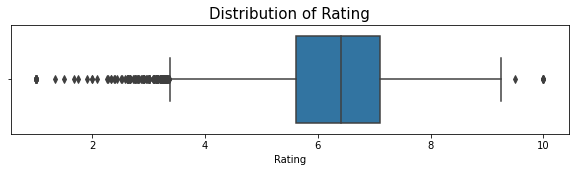

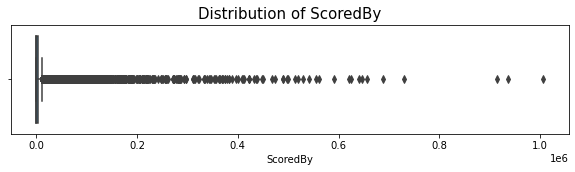

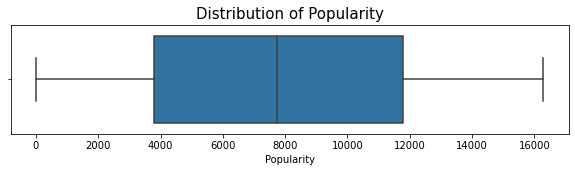

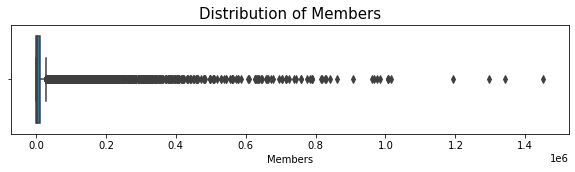

In [62]:
num_list=['Rating','ScoredBy','Popularity','Members']
for col in num_list:
    outliers(df,col)

### Uniformity

### Consistency

In [63]:
try:
    df['Aired'] = pd.to_datetime(df['Aired'])
except:
    print()